In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import mord
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.columns

Index([u'Music', u'Slow songs or fast songs', u'Dance', u'Folk', u'Country',
       u'Classical music', u'Musical', u'Pop', u'Rock', u'Metal or Hardrock',
       ...
       u'Life struggles', u'Happiness in life', u'Energy levels',
       u'Small - big dogs', u'Personality', u'Finding lost valuables',
       u'Getting up', u'Interests or hobbies', u'Parents' advice',
       u'Questionnaires or polls'],
      dtype='object', length=117)

In [4]:
music = df.iloc[:,:19]
movies = df.iloc[:,19:31]
interests = df.iloc[:,31:63]
personality = df.iloc[:,63:]

In [5]:
data = {'music':music,'movies':movies,'interests':interests,'personality':personality}

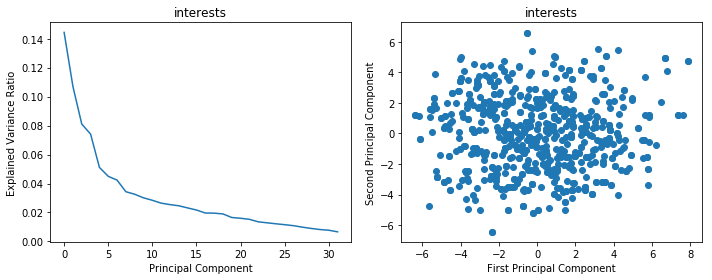

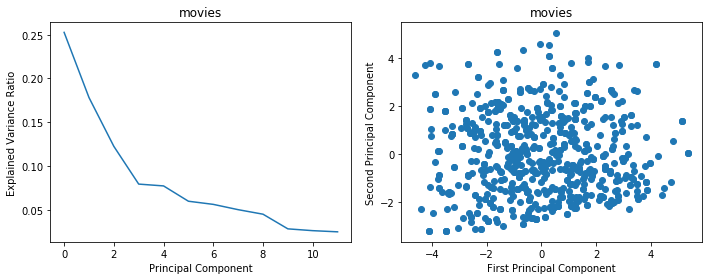

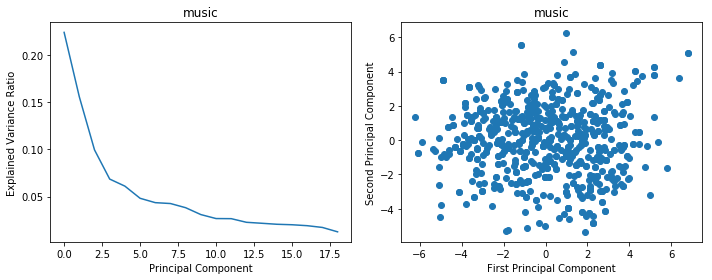

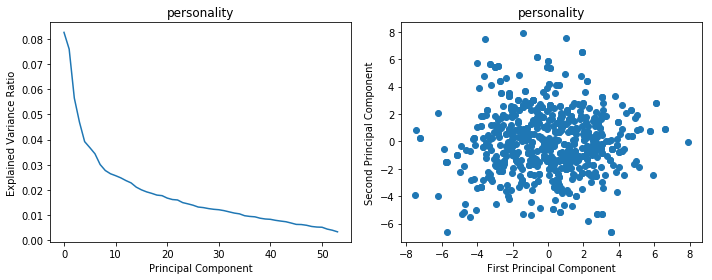

In [17]:
pca_proj = {}

for k in data.keys():
    scaled = scale(data[k],with_std = False)
    pca = PCA()
    pca.fit(scaled)
    projected = pca.fit_transform(scaled)
    
    pca_proj[k] = projected
    
    plt.figure(figsize=(10,4)) 
    plt.subplot(1, 2, 1)
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(k)
    plt.subplot(1, 2, 2)
    plt.scatter(projected[:,0],projected[:,1])
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title(k)
    plt.tight_layout()
    plt.show()

## Correlations

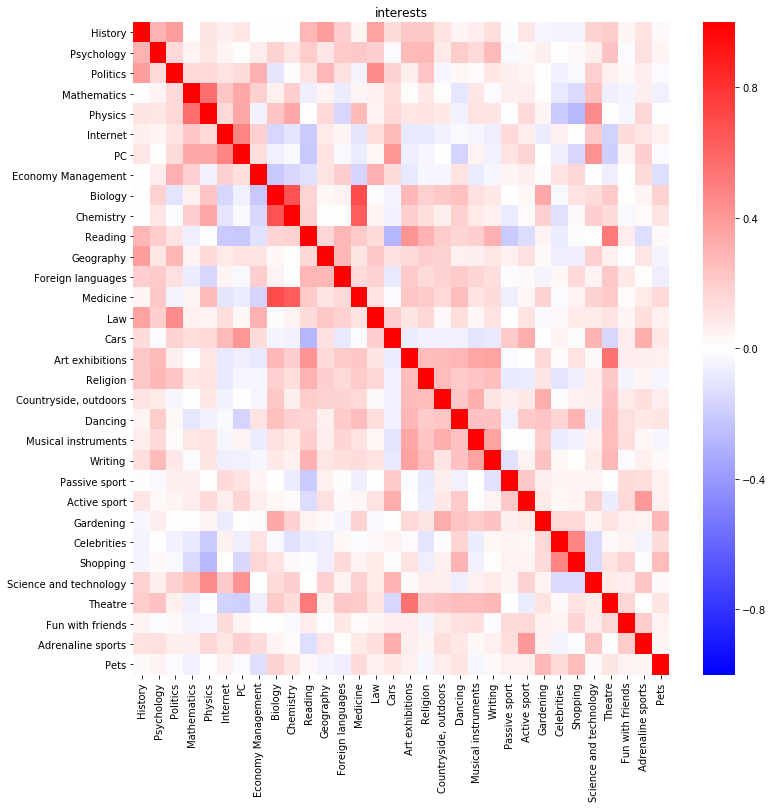

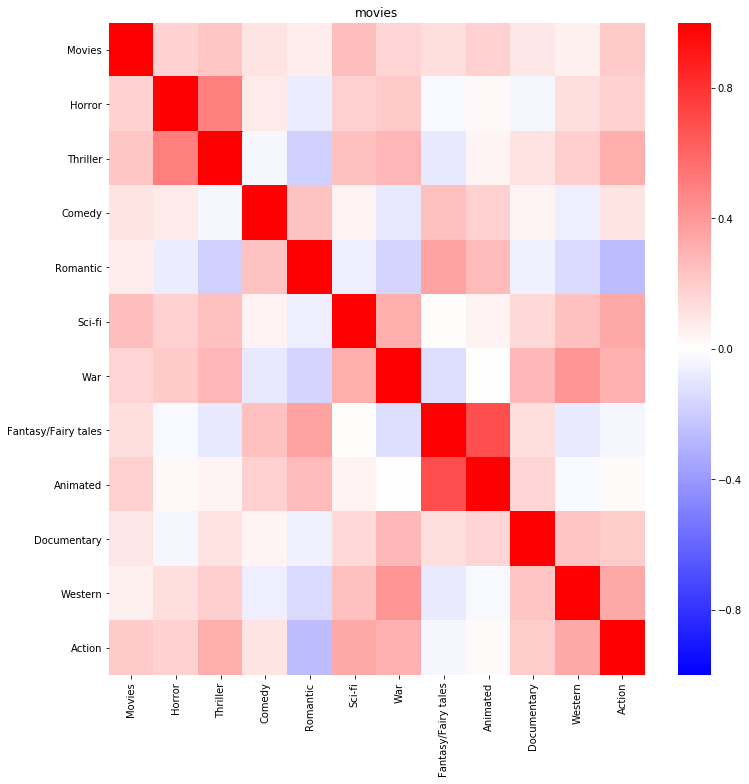

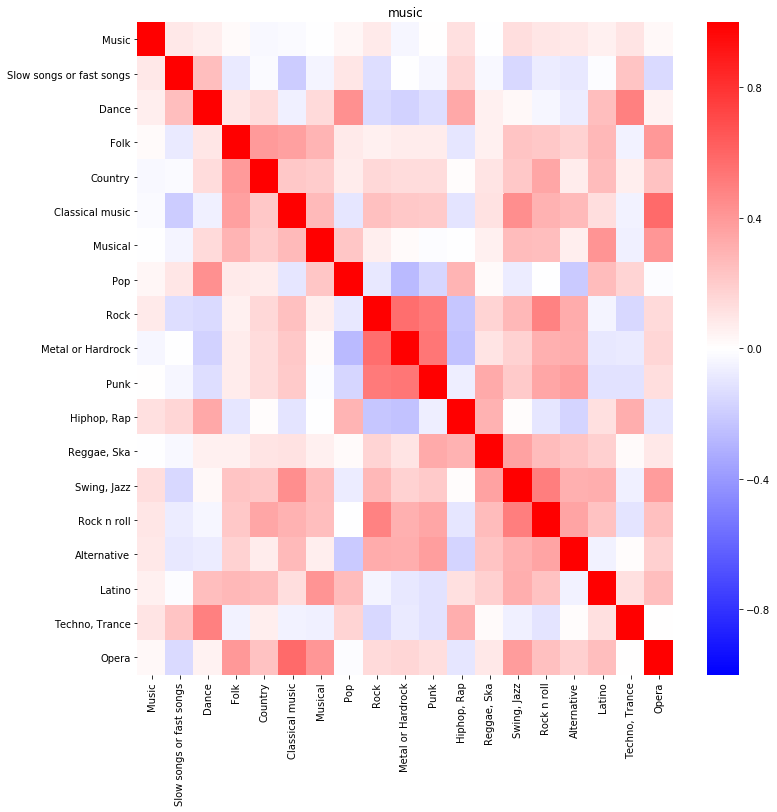

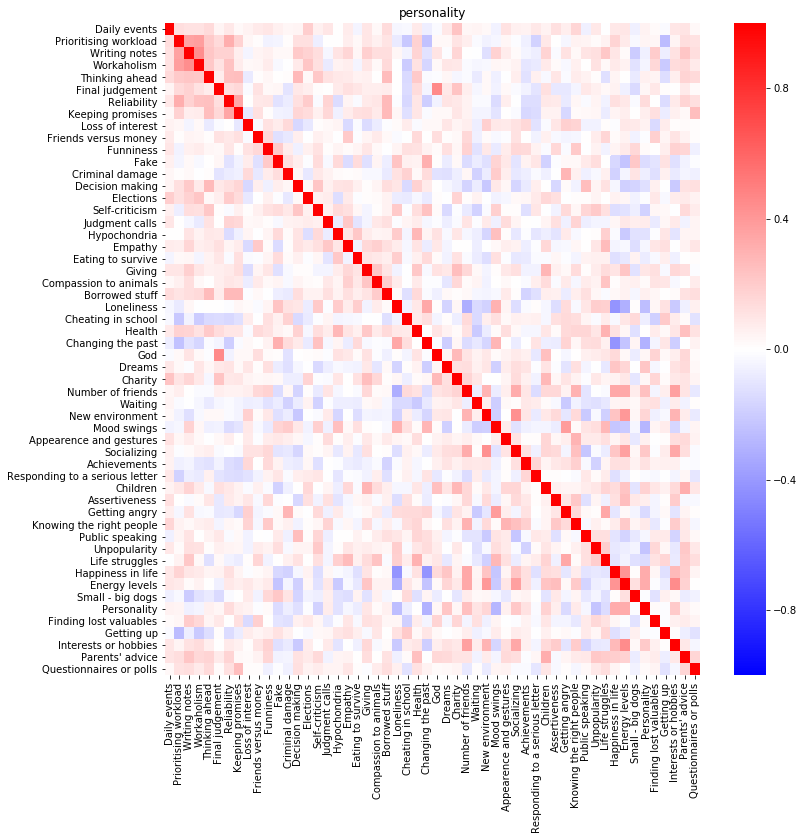

In [7]:
for k in data.keys():

    plt.figure(figsize=(12,12))
    set_ = data[k]
    sns.heatmap(set_.corr() , vmin= -1 , vmax = 1 , cmap = 'bwr', xticklabels=set_.columns , yticklabels=set_.columns)
    plt.title(k)
    plt.show()


## Unobservable Varaibles (personality)

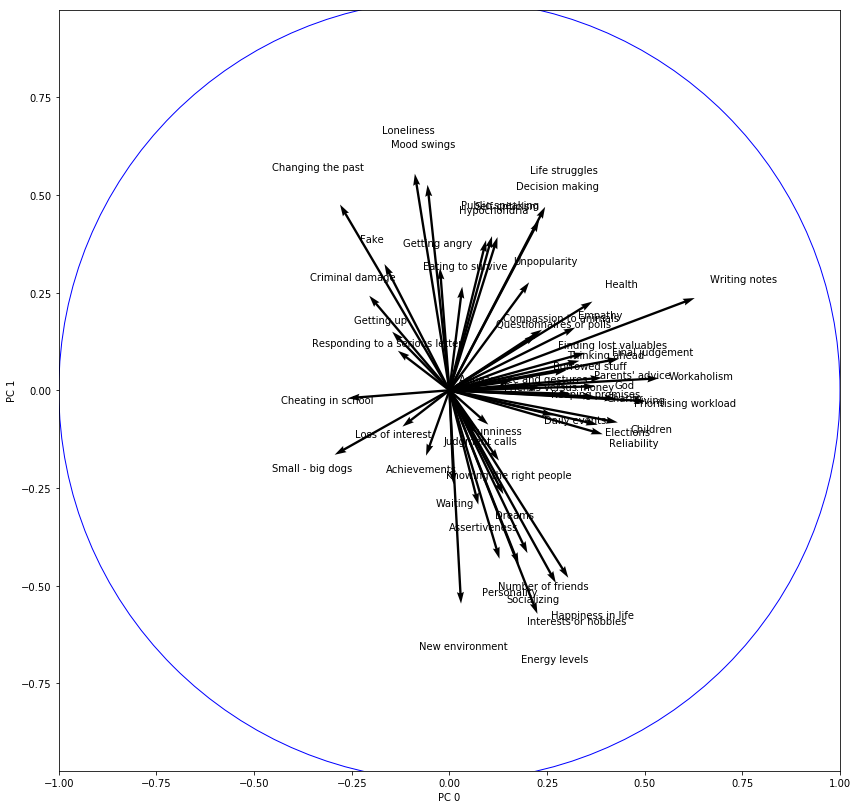

In [60]:

projected = pca_proj['personality']


PCs = pca.components_
k = 54 # max = 54 

dim1 = []
dim2 = []

for var in range(k):
    dim1.append(np.corrcoef(projected[:,0] ,  personality.iloc[:,var])[0,1])
    dim2.append(np.corrcoef(projected[:,1] ,  personality.iloc[:,var])[0,1])


# Use quiver to generate the basic plot
fig = plt.figure(figsize=(14,14))

plt.quiver(np.zeros( k ) , np.zeros( k ),
           dim1, dim2, 
           angles='xy', scale_units='xy',scale = 1 , width = .003)

# plt.quiver(np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ), np.zeros(PCs.shape[1] - ( PCs.shape[1] - k ) ),
#            PCs[0,:k], PCs[1,:k], 
#            angles='xy', scale_units='xy',scale = 1 , width = .004, color = 'blue')

# plt.scatter(dim1,dim2 )



# Add labels based on feature names (here just numbers)

spacing = 1.2

feature_names = personality.columns[:k]
for i,j,z in zip(np.array(dim2) * spacing , np.array(dim1) * spacing , feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

# Done
plt.show()

In [62]:
for i in range(len(dim1)):
    if abs(dim1[i]) > .35 : print personality.columns[i]

Prioritising workload
Writing notes
Workaholism
Final judgement
Reliability
Elections
Giving
Health
God
Charity
Children
Parents' advice


## Ordinal Logistic Regression

In [55]:
#pip intall mord

y_true = np.array( list(map(int,personality['Writing notes'] ))) # test_y

ord_logit = mord.LogisticIT(alpha=1.0)
ord_logit.fit(X = pca_proj['music'][:,:10] , y = y_true )

y_pred = ord_logit.predict(pca_proj['music'][:,:10])

plot_confusion_matrix( confusion_matrix( y_true , y_pred ) , classes=[1,2,3,4,5]


In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 52  16  24   0  31]
 [ 46  13  33   0  46]
 [ 25  28  29   0  69]
 [ 22  19  32   0  65]
 [ 17  17  19   0 104]]


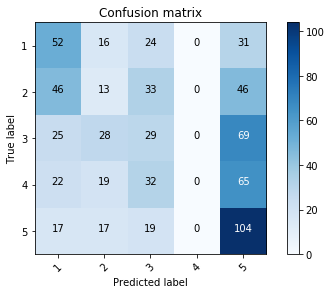

In [58]:
plot_confusion_matrix( confusion_matrix( y_true , y_pred ) , classes=[1,2,3,4,5])